In [182]:
{-# LANGUAGE NoMonomorphismRestriction #-}
{-# LANGUAGE FlexibleContexts          #-}
{-# LANGUAGE TypeFamilies              #-}
import Data.Active
import Diagrams.Prelude
import Diagrams.Backend.Cairo
import IHaskell.Display
import Diagrams.Animation
import Linear.Vector

let n = 1000
let wdth = 1000.0
let hight = 1000.0
let rnds = zip [0.71381676, 0.97519198, 0.5269516 , 0.69709396, 0.98711445,    
                0.72417357, 0.0256388 , 0.92460535, 0.90929769, 0.19543392,
                0.09917862, 0.31772953, 0.91473329, 0.59462692, 0.78269606,
                0.56425287, 0.19672232, 0.20412331, 0.46596662, 0.54452717,
                0.19082724, 0.12224448, 0.40943679, 0.56259533, 0.63179609] 
          [0.29315659, 0.46098944, 0.49039312, 0.12098803, 0.90728046,
                0.51044478, 0.21678119, 0.07155978, 0.90845366, 0.40823845,
                0.98755371, 0.91968892, 0.39915436, 0.10547007, 0.587491  ,
                0.76485863, 0.31350975, 0.11020342, 0.90354456, 0.01750179,
                0.6543156 , 0.03939264, 0.62019868, 0.82719017, 0.25508762]
let std = map (/n) [0..n]
let pt = circle 0.002 # fc black
rad = 100
draw points = atPoints (map p2 points) $ repeat pt

In [168]:
let rands = zipWith translate rnds (replicate n (circle 0.01))

<interactive>:1:21: error:
    • Couldn't match type ‘V c’ with ‘Point V2’
      Expected type: P2 (N c) -> c -> c
        Actual type: Vn c -> c -> c
    • In the first argument of ‘zipWith’, namely ‘translate’
      In the expression: zipWith translate rnds (replicate n (circle 0.01))
      In an equation for ‘rands’: rands = zipWith translate rnds (replicate n (circle 0.01))
    • Relevant bindings include rands :: [c] (bound at <interactive>:1:5)

In [106]:
anim :: Animation B V2 Double
anim = pure (\t -> rotateBy (t) (circle 1 ||| circle 1)) <*> ui

In [200]:
sc1 = rnds
sc2 = zip std (repeat 0.0)
sc3 = map (\x -> (rad*cos(2*pi*x), rad*sin(2*pi*x))) std
sc4 = sc2

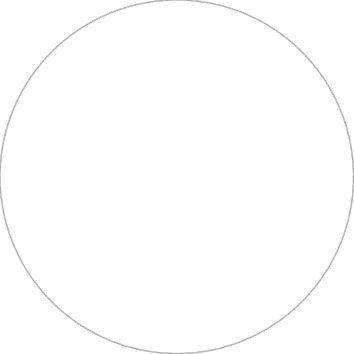

In [199]:
scenes = [sc2,sc3,sc4]

In [202]:
anim :: Animation B V2 Double
anim = (\t -> rotateBy (t) (circle 1 ||| circle 1)) 
    <$> ui

In [174]:
:t rad

rad :: forall (p :: * -> * -> *) (f :: * -> *) n. (Functor f, Profunctor p) => p n (f n) -> p (Angle n) (f (Angle n))